In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [2]:
df=pd.read_csv(r"kaggle_diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [4]:
df.shape

(2000, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [8]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [9]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


In [10]:
df=df.rename(columns={'DiabetesPedigreeFunction':'DPF'})
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


<Axes: xlabel='Outcome', ylabel='count'>

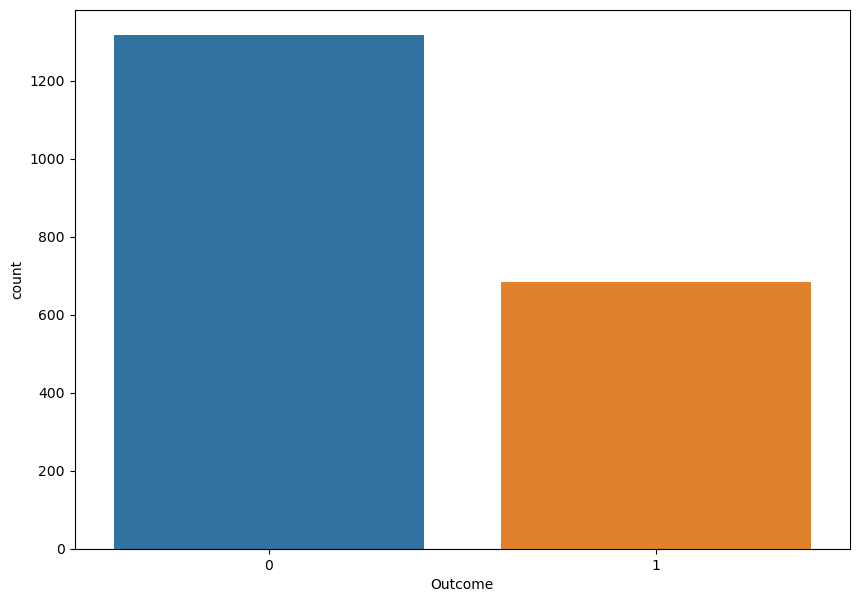

In [11]:
plt.figure(figsize=(10,7))
sns.countplot(x="Outcome",data=df)

In [12]:
data_copy=df.copy(deep=True)
data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]=data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NAN)
data_copy.isnull().sum()

Pregnancies        0
Glucose           13
BloodPressure     90
SkinThickness    573
Insulin          956
BMI               28
DPF                0
Age                0
Outcome            0
dtype: int64

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DPF'}>, <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

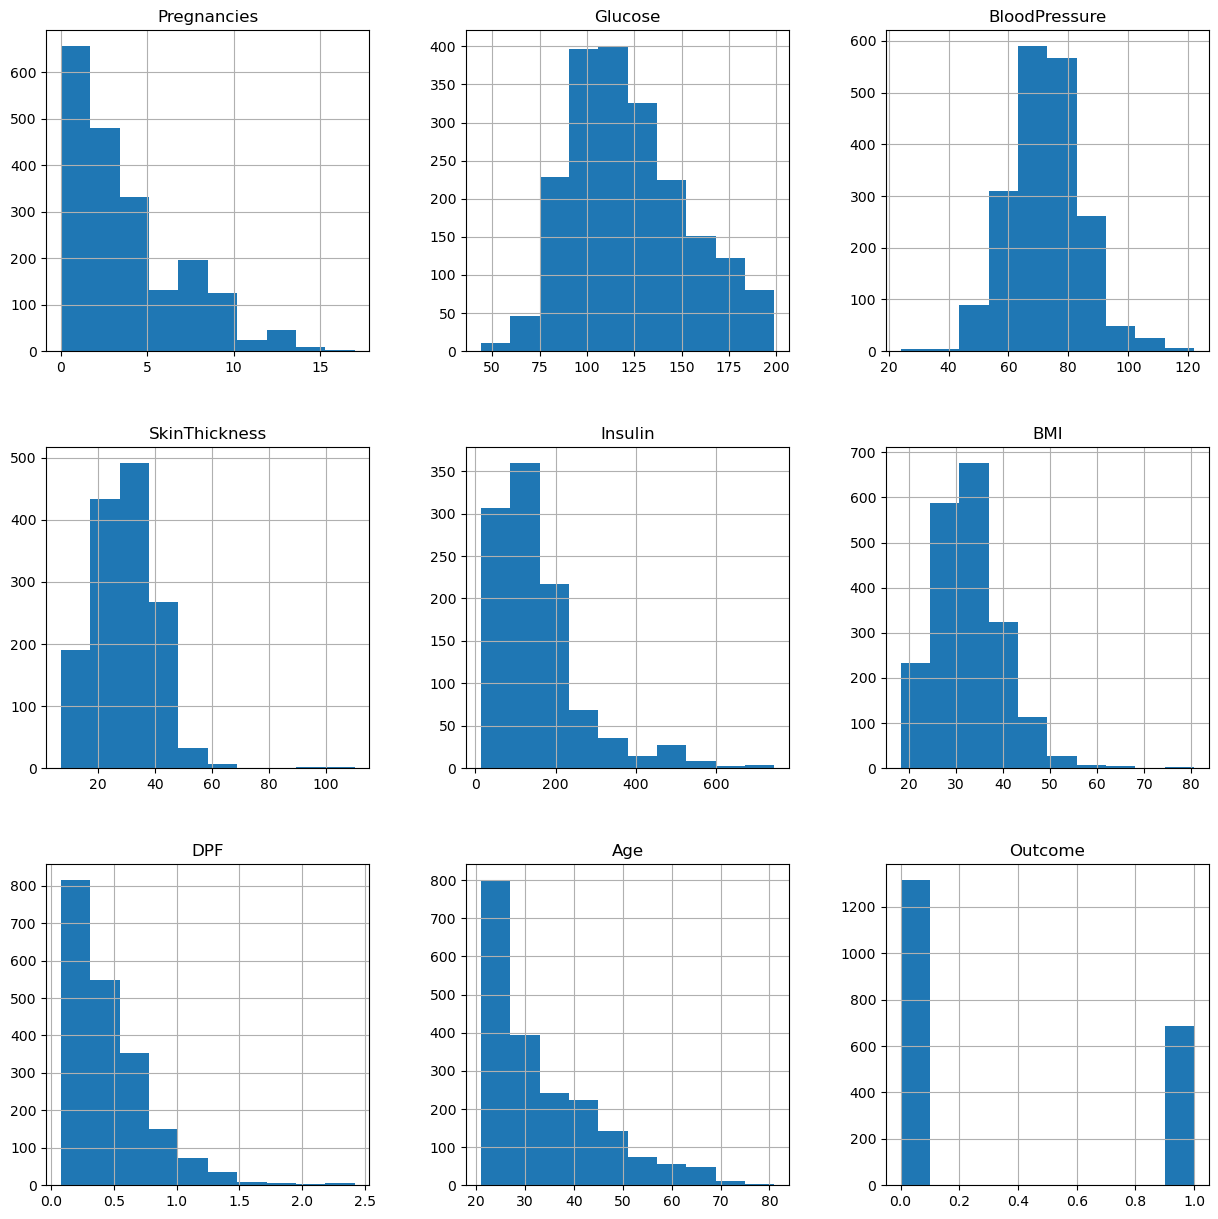

In [13]:
data_copy.hist(figsize=(15, 15))  # ✅ Correct


In [14]:
data_copy['Glucose'].fillna(data_copy['Glucose'].mean(),inplace=True)
data_copy['BloodPressure'].fillna(data_copy['BloodPressure'].mean(),inplace=True)
data_copy['SkinThickness'].fillna(data_copy['SkinThickness'].median(),inplace=True)
data_copy['Insulin'].fillna(data_copy['Insulin'].median(),inplace=True)
data_copy['BMI'].fillna(data_copy['BMI'].median(), inplace=True)

C:\Users\shett\AppData\Local\Temp\ipykernel_11444\656376256.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_copy['Glucose'].fillna(data_copy['Glucose'].mean(),inplace=True)
C:\Users\shett\AppData\Local\Temp\ipykernel_11444\656376256.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves 

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DPF'}>, <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

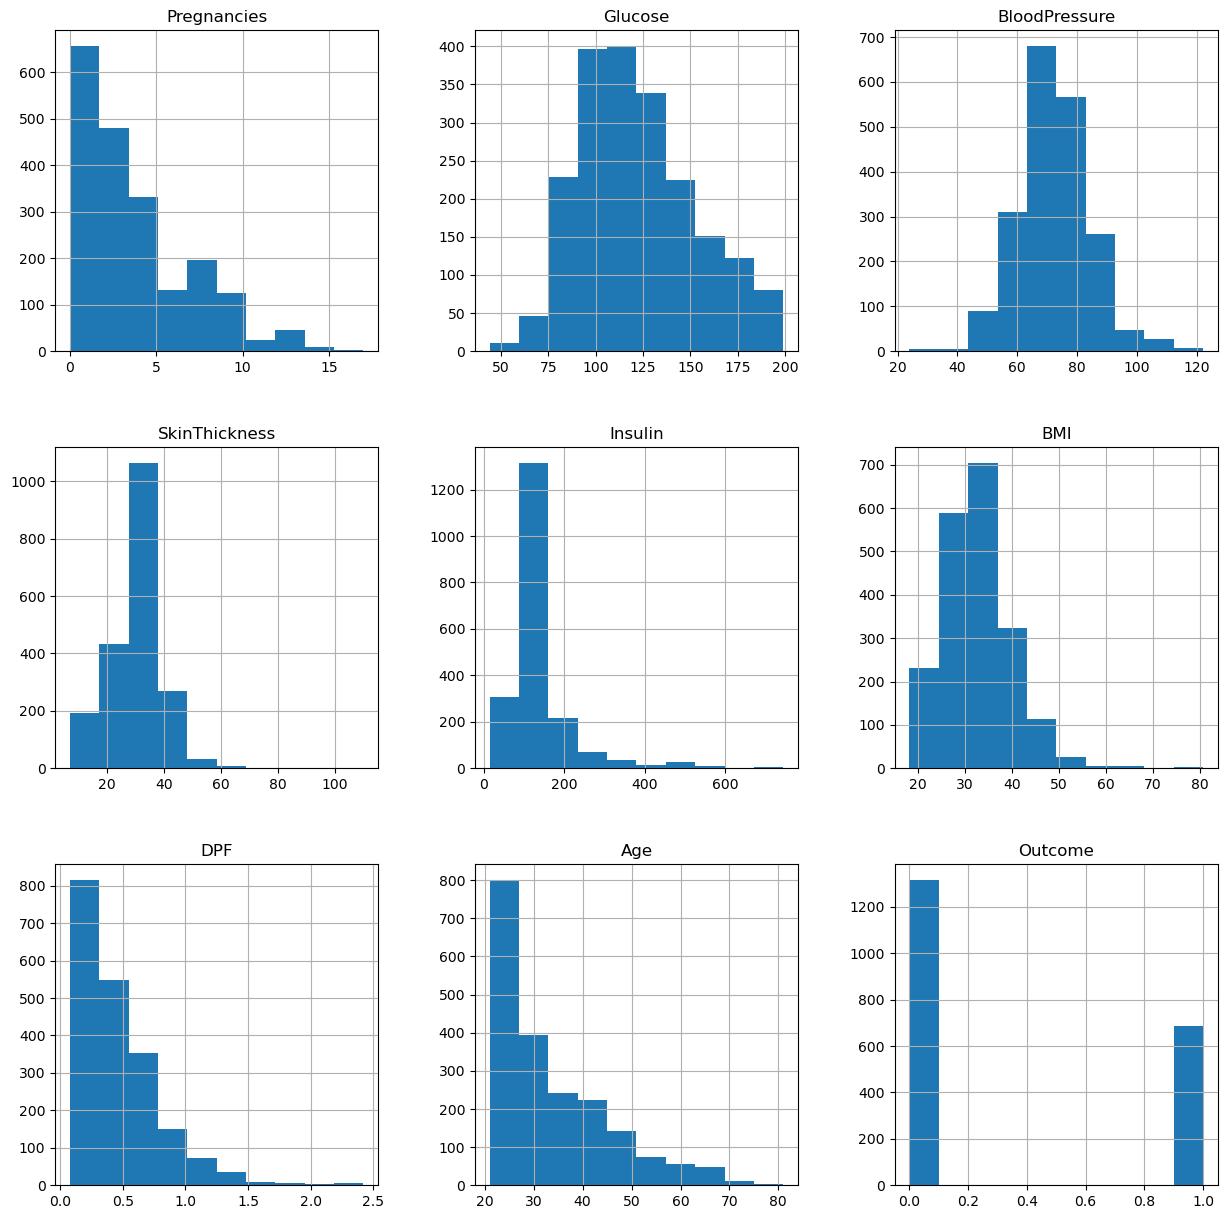

In [15]:
data_copy.hist(figsize=(15,15))

In [16]:
data_copy.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
DPF              0
Age              0
Outcome          0
dtype: int64

In [17]:
from sklearn.model_selection import train_test_split
X=data_copy.drop(columns=["Outcome"])
y=data_copy["Outcome"]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
print('X_train size: {}, X_test size: {}'.format(X_train.shape, X_test.shape))

X_train size: (1600, 8), X_test size: (400, 8)


In [19]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [21]:
def find_best_model(X, y):
    models = {
        'LogisticRegression': {
            'model': LogisticRegression(solver='lbfgs', multi_class='auto'),
            'parameters': { 
                'C': [1, 2, 10]
            }
        },

        'DecisionTree': {
            'model': DecisionTreeClassifier(splitter='best'),
            'parameters': {
                'criterion': ['gini', 'entropy'],
                'max_depth': [5, 10]
            }
        },

        'RandomForestClassifier': {
            'model': RandomForestClassifier(criterion='gini'),
            'parameters': {
                'n_estimators': [10, 15, 20, 50, 100, 200]
            }
        },

        'svm': {
            'model': SVC(gamma='auto'),
            'parameters': {
                'C': [1, 10, 20],
                'kernel': ['rbf', 'linear']
            }
        }
    }

    scores = []
    cv_shuffle = ShuffleSplit(n_splits=5, test_size=0.20, random_state=42)

    for model_name, model_params in models.items():
        gs = GridSearchCV(model_params['model'], model_params['parameters'], cv=cv_shuffle, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': model_name,
            'best_parameters': gs.best_params_,
            'score': gs.best_score_
        })

    return pd.DataFrame(scores, columns=['model', 'best_parameters', 'score'])


In [22]:
find_best_model(X_train, y_train)

c:\Users\shett\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\shett\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\shett\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\shett\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in versio

,model,best_parameters,score
0,LogisticRegression,{'C': 10},0.769375
1,DecisionTree,"{'criterion': 'gini', 'max_depth': 10}",0.916875
2,RandomForestClassifier,{'n_estimators': 50},0.964375
3,svm,"{'C': 20, 'kernel': 'rbf'}",0.851875


In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV, ShuffleSplit
import pandas as pd



def find_best_model(X, y):
    models = {
        'LogisticRegression': {
            'model': LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=1000),
            'parameters': {
                'C': [1, 2, 10]
            }
        },
        'DecisionTree': {
            'model': DecisionTreeClassifier(splitter='best'),
            'parameters': {
                'criterion': ['gini', 'entropy'],
                'max_depth': [5, 10]
            }
        },
        'RandomForestClassifier': {
            'model': RandomForestClassifier(),
            'parameters': {
                'n_estimators': [50, 100],
                'max_depth': [None, 10]
            }
        },
        'GradientBoosting': {
            'model': GradientBoostingClassifier(),
            'parameters': {
                'n_estimators': [50, 100],
                'learning_rate': [0.01, 0.1]
            }
        },
        'svm': {
            'model': SVC(gamma='auto'),
            'parameters': {
                'C': [1, 10],
                'kernel': ['rbf', 'linear']
            }
        },
        'KNN': {
            'model': KNeighborsClassifier(),
            'parameters': {
                'n_neighbors': [3, 5, 7]
            }
        },
        'NaiveBayes': {
            'model': GaussianNB(),
            'parameters': {}  # No hyperparameters to tune here
        },
        'MLPClassifier': {
            'model': MLPClassifier(max_iter=500),
            'parameters': {
                'hidden_layer_sizes': [(50,), (100,)],
                'activation': ['relu', 'tanh']
            }
        }
    }


    scores = []
    cv_shuffle = ShuffleSplit(n_splits=5, test_size=0.20, random_state=42)

    for model_name, model_params in models.items():
        gs = GridSearchCV(model_params['model'], model_params['parameters'], cv=cv_shuffle, n_jobs=-1)
        gs.fit(X, y)
        scores.append({
            'model': model_name,
            'best_parameters': gs.best_params_,
            'score': gs.best_score_
        })

    return pd.DataFrame(scores, columns=['model', 'best_parameters', 'score'])


In [24]:
find_best_model(X_train, y_train)

c:\Users\shett\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\shett\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


,model,best_parameters,score
0,LogisticRegression,{'C': 10},0.769375
1,DecisionTree,"{'criterion': 'gini', 'max_depth': 10}",0.916250
2,RandomForestClassifier,"{'max_depth': None, 'n_estimators': 50}",0.960625
3,GradientBoosting,"{'learning_rate': 0.1, 'n_estimators': 100}",0.860625
4,svm,"{'C': 10, 'kernel': 'rbf'}",0.842500
5,KNN,{'n_neighbors': 3},0.823750
6,NaiveBayes,{},0.760000
7,MLPClassifier,"{'activation': 'relu', 'hidden_layer_sizes': (...",0.843125


In [25]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(RandomForestClassifier(n_estimators=20, random_state=0), X_train, y_train, cv=5)
print('Average Accuracy : {}%'.format(round(sum(scores)*100/len(scores)), 3))

Average Accuracy : 95%


In [26]:
classifier = RandomForestClassifier(n_estimators=20, random_state=0)
classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20, random_state=0)

Model Evaluation

In [38]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
y_pred=classifier.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
cm

array([[249,   4],
       [ 13, 134]], dtype=int64)

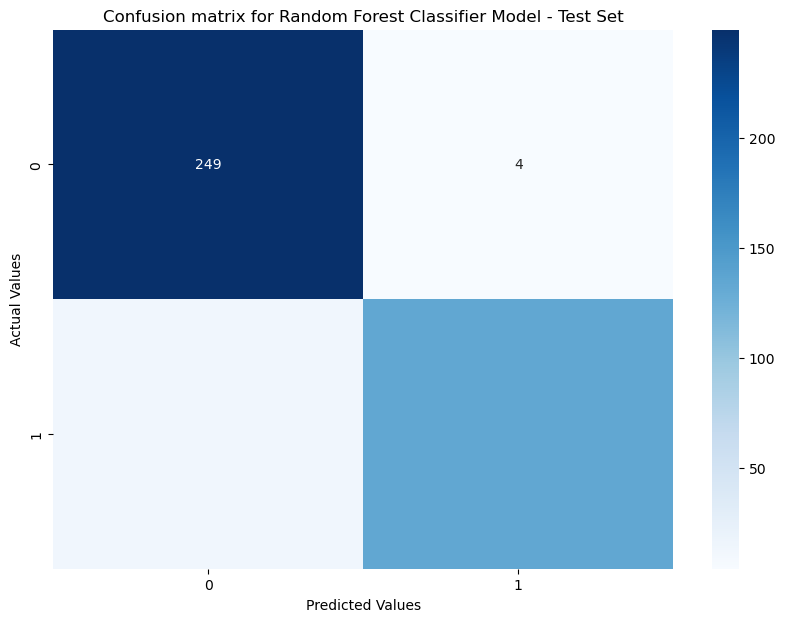

In [39]:
# Plotting the confusion matrix
plt.figure(figsize=(10,7))
p = sns.heatmap(cm, annot=True, cmap="Blues", fmt='g')
plt.title('Confusion matrix for Random Forest Classifier Model - Test Set')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()


In [41]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       253
           1       0.97      0.91      0.94       147

    accuracy                           0.96       400
   macro avg       0.96      0.95      0.95       400
weighted avg       0.96      0.96      0.96       400



In [42]:
# Creating a confusion matrix for training set
y_train_pred = classifier.predict(X_train)
cm = confusion_matrix(y_train, y_train_pred)
cm

array([[1063,    0],
       [   1,  536]], dtype=int64)

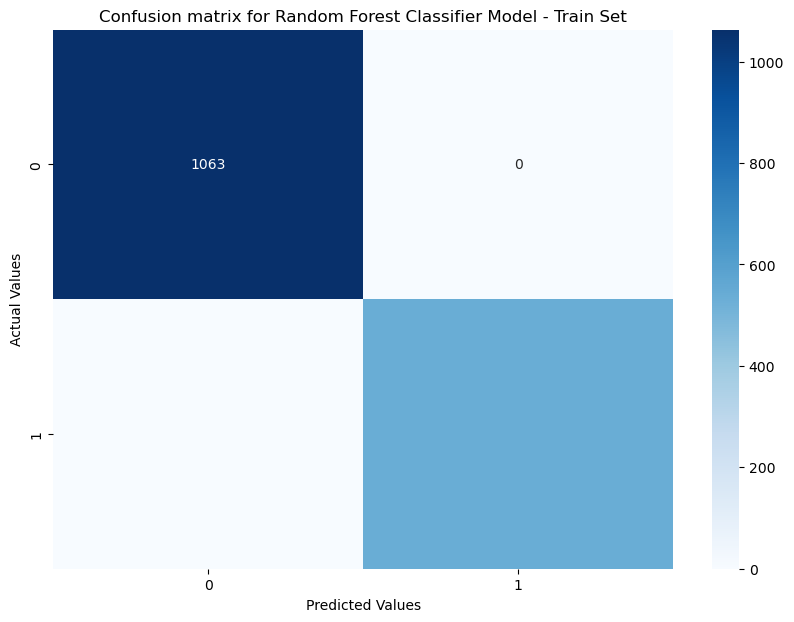

In [43]:
# Plotting the confusion matrix
plt.figure(figsize=(10,7))
p = sns.heatmap(cm, annot=True, cmap="Blues", fmt='g')
plt.title('Confusion matrix for Random Forest Classifier Model - Train Set')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [44]:
score = round(accuracy_score(y_train, y_train_pred),4)*100
print("Accuracy on trainning set: {}%".format(score))

Accuracy on trainning set: 99.94%


In [45]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1063
           1       1.00      1.00      1.00       537

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600



Predictions

In [47]:
def predict_diabetes(Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DPF, Age):
    preg = int(Pregnancies)
    glucose = float(Glucose)
    bp = float(BloodPressure)
    st = float(SkinThickness)
    insulin = float(Insulin)
    bmi = float(BMI)
    dpf = float(DPF)
    age = int(Age)

    x = [[preg, glucose, bp, st, insulin, bmi, dpf, age]]
    x = sc.transform(x)

    return classifier.predict(x)

In [48]:
# Prediction 1
# Input sequence: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DPF, Age
prediction = predict_diabetes(2, 81, 72, 15, 76, 30.1, 0.547, 25)[0]
if prediction:
  print('Oops! You have diabetes.')
else:
  print("Great! You don't have diabetes.")

Great! You don't have diabetes.


c:\Users\shett\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
